# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [259]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [287]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

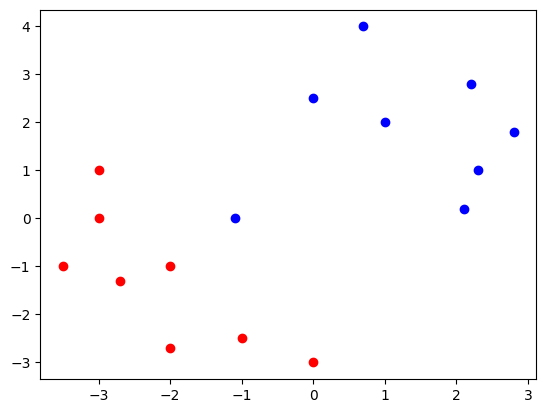

In [288]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [289]:
m=0
n=0

for i in y:
    if i==1:
        m=m+1
    else:
        n=n+1
        
cluster1=X[0:m,:]
cluster2=X[m:,:]

In [290]:
# Write your code here

W = cp.Variable((2,1))
b = cp.Variable()

obj = cp.Minimize(0.5*cp.square(cp.norm(W,2)))
               
xvals = [(W.T @ cluster1[i] + b) >=1 for i in range(m)]
yvals = [W.T @ cluster2[i] + b <=-1 for i in range(n)]
               
constraints=xvals+yvals
               
prob=cp.Problem(obj,constraints)
               
prob.solve()
               
Wf=W.value
bf=b.value
               
print("Value of W is: \n",Wf)
print("\n")
print("Value of b is: \n",bf)

Value of W is: 
 [[-1.73913043]
 [-1.30434783]]


Value of b is: 
 -2.9130434780347696


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

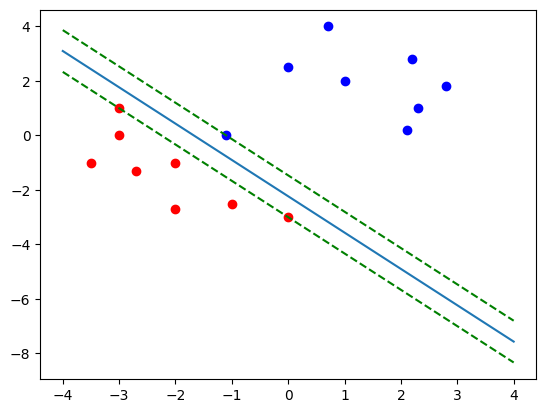

In [291]:
# Write your code here

x= np.linspace(-4,4,20)

def plotsepline(Wf,bf,cluster1,x):
    m=(-bf - Wf[0]*cluster1)/Wf[1]
    plt.plot(x,(-bf - (Wf[0]*x))/Wf[1])
    plt.plot(x,(-bf - (Wf[0]*x)+1)/Wf[1],'g--')
    plt.plot(x,(-bf - (Wf[0]*x)-1)/Wf[1],'g--')

plotsepline(Wf,bf,cluster1,x)
plot_points(X, y)
plt.show()

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

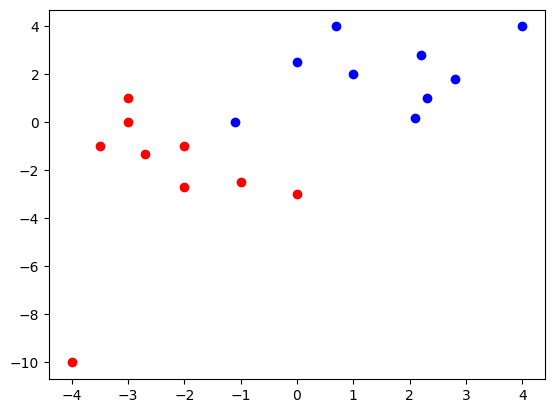

In [292]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-4, -10], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8], [4, 4]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In [293]:
# Solve for the decision boundary using this modified dataset

In [294]:
m=0
n=0

for i in y:
    if i==1:
        m=m+1
    else:
        n=n+1
        
cluster1=X[0:m,:]
cluster2=X[m:,:]

In [295]:
# Write your code here

W = cp.Variable((2,1))
b = cp.Variable()

obj = cp.Minimize(0.5*cp.square(cp.norm(W,2)))
               
xvals = [W.T @ cluster1[i] + b >=1 for i in range(m)]
yvals = [W.T @ cluster2[i] + b <=-1 for i in range(n)]
               
constraints=xvals+yvals
               
prob=cp.Problem(obj,constraints)
               
prob.solve()
               
Wf=W.value
bf=b.value
               
print("Value of W is: \n",Wf)
print("\n")
print("Value of b is: \n",bf)

Value of W is: 
 [[-1.73913043]
 [-1.30434783]]


Value of b is: 
 -2.9130434782913306


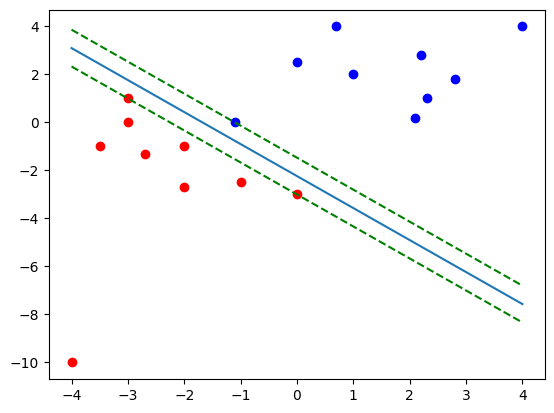

In [296]:
# Write your code here

x= np.linspace(-4,4,20)

def plotsepline(Wf,bf,cluster1,x):
    # m=(-bf - Wf[0]*cluster1)/Wf[1]
    plt.plot(x,(-bf - Wf[0]*x)/Wf[1])
    plt.plot(x,(-bf - (Wf[0]*x)+1)/Wf[1],'g--')
    plt.plot(x,(-bf - (Wf[0]*x)-1)/Wf[1],'g--')

plotsepline(Wf,bf,cluster1,x)
plot_points(X, y)

plt.show()

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [297]:
# Write your code here for C= 0.01

### C = 0.01

In [298]:
# Write your code here

C=0.01

W = cp.Variable((2,1))
b = cp.Variable()
slack1 = cp.Variable((m))
slack2 = cp.Variable((n))

# obj = cp.Minimize(cp.norm(W,2) + C*cp.sum(slack))
obj = cp.Minimize(0.5*cp.square(cp.norm(W,2))+C*(cp.sum(slack1)+cp.sum(slack2)))
               
xvals = [W.T @ cluster1[i] + b >=1-slack1[i] for i in range(m)]
yvals = [W.T @ cluster2[i] + b <=slack2[i]-1 for i in range(n)]
Slack1 = [slack1[i]>=0 for i in range(m)]
Slack2 = [slack2[i]>=0 for i in range(n)]

               
constraints=xvals+yvals+Slack1+Slack2
               
prob=cp.Problem(obj,constraints)
               
prob.solve()
               
Wf=W.value
bf=b.value
               
print("Value of W is: \n",Wf)
print("\n")
print("Value of b is: \n",bf)
print("\n")
print("Value of slack1 is: \n",slack1.value)
print("\n")
print("Value of slack2 is: \n",slack2.value)

Value of W is: 
 [[-0.22506809]
 [-0.19858949]]


Value of b is: 
 0.013672204267194923


Value of slack1 is: 
 [2.43053671e-10 3.11123533e-01 5.09713022e-01 1.20477623e-01
 3.37602132e-01 1.16141940e-10 2.64785985e-01 3.90559328e-01
 7.57619364e-11]


Value of slack2 is: 
 [1.26124710e+00 5.17198481e-01 3.91425138e-01 6.17665864e-02
 5.01311323e-01 2.97426114e-01 2.60204787e-02 7.83361091e-11
 7.56896690e-11]


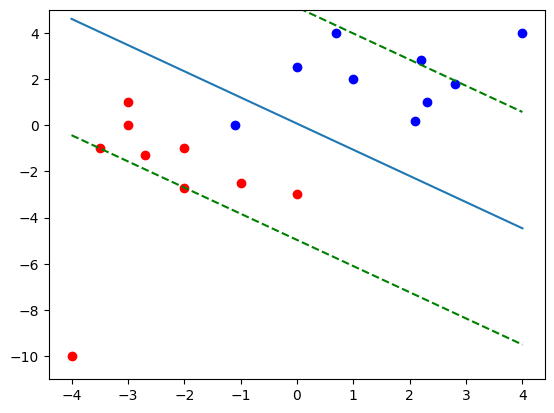

In [299]:
# Write your code here

x= np.linspace(-4,4,20)

plotsepline(Wf,bf,cluster1,x)
plot_points(X, y)
plt.ylim(-11,5)
plt.show()

In [300]:
# Write your code here for C= 0.1

### C = 0.1

In [302]:
# Write your code here

C=0.1

W = cp.Variable((2,1))
b = cp.Variable()
slack1 = cp.Variable((m))
slack2 = cp.Variable((n))

# obj = cp.Minimize(cp.norm(W,2) + C*cp.sum(slack))
obj = cp.Minimize(0.5*cp.square(cp.norm(W,2))+C*(cp.sum(slack1)+cp.sum(slack2)))
               
xvals = [W.T @ cluster1[i] + b >=1-slack1[i] for i in range(m)]
yvals = [W.T @ cluster2[i] + b <=slack2[i]-1 for i in range(n)]
# Slack1 = [slack1[i]>=0 for i in range(m)]
# Slack2 = [slack2[i]>=0 for i in range(n)]
Slack1 = [slack1[i]>=0 for i in range(m)]
Slack2 = [slack2[i]>=0 for i in range(n)]

               
constraints=xvals+yvals+Slack1+Slack2
               
prob=cp.Problem(obj,constraints)
               
prob.solve()
               
Wf=W.value
bf=b.value
               
print("Value of W is: \n",Wf)
print("\n")
print("Value of b is: \n",bf)
print("\n")
print("Value of slack1 is: \n",slack1.value)
print("\n")
print("Value of slack2 is: \n",slack2.value)

Value of W is: 
 [[-0.38493724]
 [-0.35146444]]


Value of b is: 
 -0.12133891201898876


Value of slack1 is: 
 [1.51139122e-11 1.51815164e-11 3.17991632e-01 1.23137435e-11
 3.83718821e-11 1.23314684e-11 1.63898574e-11 6.69456064e-02
 2.09121200e-11]


Value of slack2 is: 
 [1.30209205e+00 3.16158857e-11 2.06008539e-11 1.46826289e-11
 1.86523759e-10 1.41617103e-11 1.74581490e-11 1.90961162e-11
 2.12865802e-11]


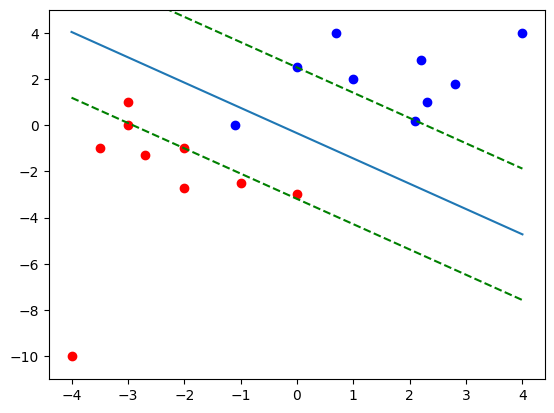

In [303]:
# Write your code here

x= np.linspace(-4,4,20)

plotsepline(Wf,bf,cluster1,x)
plot_points(X, y)

plt.ylim(-11, 5)
plt.show()

In [304]:
# Write your code here for C= 3

### C = 3

In [305]:
# Write your code here

C=3

W = cp.Variable((2,1))
b = cp.Variable()
slack1 = cp.Variable((m))
slack2 = cp.Variable((n))

# obj = cp.Minimize(cp.norm(W,2) + C*cp.sum(slack))
obj = cp.Minimize(0.5*cp.square(cp.norm(W,2))+C*(cp.sum(slack1)+cp.sum(slack2)))
               
xvals = [W.T @ cluster1[i] + b >=1-slack1[i] for i in range(m)]
yvals = [W.T @ cluster2[i] + b <=slack2[i]-1 for i in range(n)]
# Slack1 = [slack1[i]>=0 for i in range(m)]
# Slack2 = [slack2[i]>=0 for i in range(n)]
Slack1 = [slack1[i]>=0 for i in range(m)]
Slack2 = [slack2[i]>=0 for i in range(n)]

               
constraints=xvals+yvals+Slack1+Slack2
               
prob=cp.Problem(obj,constraints)
               
prob.solve()
               
Wf=W.value
bf=b.value
               
print("Value of W is: \n",Wf)
print("\n")
print("Value of b is: \n",bf)
print("\n")
print("Value of slack1 is: \n",slack1.value)
print("\n")
print("Value of slack2 is: \n",slack2.value)

Value of W is: 
 [[-1.73913043]
 [-1.30434783]]


Value of b is: 
 -2.9130434782869234


Value of slack1 is: 
 [5.34921007e-11 5.56168914e-11 2.56571430e-10 5.37763438e-11
 5.66427453e-11 5.30424038e-11 5.54780142e-11 1.48491885e-10
 5.28120975e-11]


Value of slack2 is: 
 [4.16273113e-11 5.26405786e-11 5.24200334e-11 5.24446774e-11
 5.24917423e-11 5.24223319e-11 5.24393713e-11 5.21447168e-11
 5.25538720e-11]


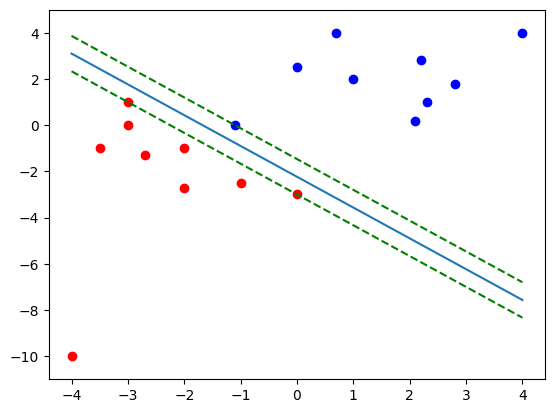

In [306]:
# Write your code here

x= np.linspace(-4,4,20)

plotsepline(Wf,bf,cluster1,x)
plot_points(X, y)

plt.ylim(-11, 5)
plt.show()

In [248]:
# Write your code here for C= 10

### C = 10

In [249]:
# Write your code here

C=10

W = cp.Variable((2,1))
b = cp.Variable()
slack1 = cp.Variable((m))
slack2 = cp.Variable((n))

# obj = cp.Minimize(cp.norm(W,2) + C*cp.sum(slack))
obj = cp.Minimize(0.5*cp.square(cp.norm(W,2))+C*(cp.sum(slack1)+cp.sum(slack2)))
               
xvals = [W.T @ cluster1[i] + b >=1-slack1[i] for i in range(m)]
yvals = [W.T @ cluster2[i] + b <=slack2[i]-1 for i in range(n)]
Slack1 = [slack1[i]>=0 for i in range(m)]
Slack2 = [slack2[i]>=0 for i in range(n)]

               
constraints=xvals+yvals+Slack1+Slack2
               
prob=cp.Problem(obj,constraints)
               
prob.solve()
               
Wf=W.value
bf=b.value
               
print("Value of W is: \n",Wf)
print("\n")
print("Value of b is: \n",bf)
print("\n")
print("Value of slack1 is: \n",slack1.value)
print("\n")
print("Value of slack2 is: \n",slack2.value)

Value of W is: 
 [[-1.73913043]
 [-1.30434783]]


Value of b is: 
 -2.9130434783567867


Value of slack1 is: 
 [-2.55882796e-12 -2.27431187e-12 -1.38789400e-13 -2.52768365e-12
 -2.26108769e-12 -2.88004283e-12 -2.39368760e-12 -1.50434556e-12
 -2.68784271e-12]


Value of slack2 is: 
 [ 2.68971566e-11 -2.25853276e-12 -2.34365346e-12 -2.79001327e-12
 -2.42538775e-12 -2.56572799e-12 -2.82731656e-12 -3.21485867e-12
 -2.84027575e-12]


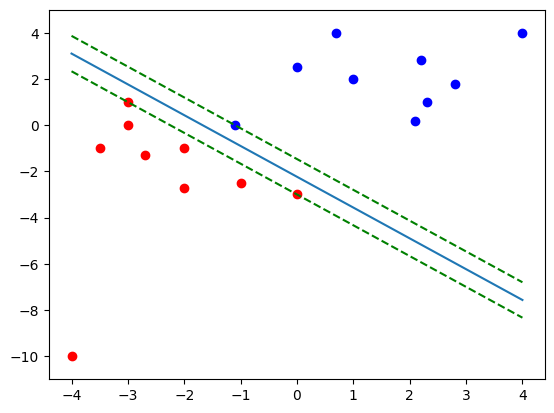

In [250]:
# Write your code here

x= np.linspace(-4,4,20)

plotsepline(Wf,bf,cluster1,x)
plot_points(X, y)

plt.ylim(-11, 5)
plt.show()

In [251]:
# Write your code here for C= 100

### C = 100

In [252]:
# Write your code here

C=100

W = cp.Variable((2,1))
b = cp.Variable()
slack1 = cp.Variable((m))
slack2 = cp.Variable((n))

# obj = cp.Minimize(cp.norm(W,2) + C*cp.sum(slack))
obj = cp.Minimize(0.5*cp.square(cp.norm(W,2))+C*(cp.sum(slack1)+cp.sum(slack2)))
               
xvals = [W.T @ cluster1[i] + b >=1-slack1[i] for i in range(m)]
yvals = [W.T @ cluster2[i] + b <=slack2[i]-1 for i in range(n)]
Slack1 = [slack1[i]>=0 for i in range(m)]
Slack2 = [slack2[i]>=0 for i in range(n)]

               
constraints=xvals+yvals+Slack1+Slack2
               
prob=cp.Problem(obj,constraints)
               
prob.solve()
               
Wf=W.value
bf=b.value
               
print("Value of W is: \n",Wf)
print("\n")
print("Value of b is: \n",bf)
print("\n")
print("Value of slack1 is: \n",slack1.value)
print("\n")
print("Value of slack2 is: \n",slack2.value)

Value of W is: 
 [[-1.73913044]
 [-1.30434783]]


Value of b is: 
 -2.913043478682627


Value of slack1 is: 
 [-3.63773293e-13 -3.63092627e-13  2.30543362e-12 -3.63652142e-13
 -3.62532265e-13 -3.63949872e-13 -3.63272933e-13  1.32281301e-12
 -3.64017264e-13]


Value of slack2 is: 
 [ 4.01338263e-12 -3.63757307e-13 -3.63788685e-13 -3.64126081e-13
 -3.63827130e-13 -3.63932962e-13 -3.64116622e-13 -3.64338001e-13
 -3.64112486e-13]


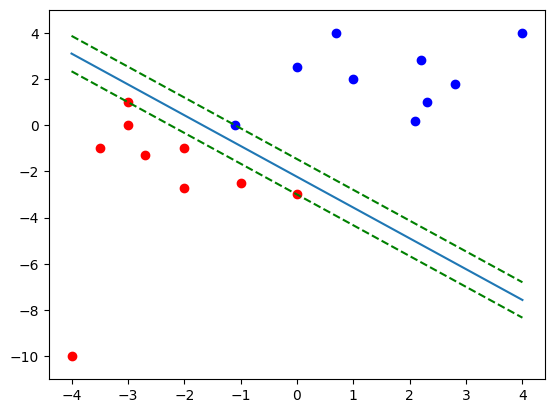

In [253]:
# Write your code here

x= np.linspace(-4,4,20)

plotsepline(Wf,bf,cluster1,x)
plot_points(X, y)

plt.ylim(-11, 5)
plt.show()

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

- The boundary does indeed change. This is due to the fact that the support vectors earlier were the limit to the boundary orientation prior to their deletion (for a high value of C). Removing these support vectors allows for the boundary to expand to the next point that provides the widest margin area. Since this point will lie 'behind' the now deleted support vector, the margin area will accordingly increase.

` Removing support vectors involves removing points (0, -3) , (-3, 1) and (-1.1, 0) `

In [254]:
# Write your Code here

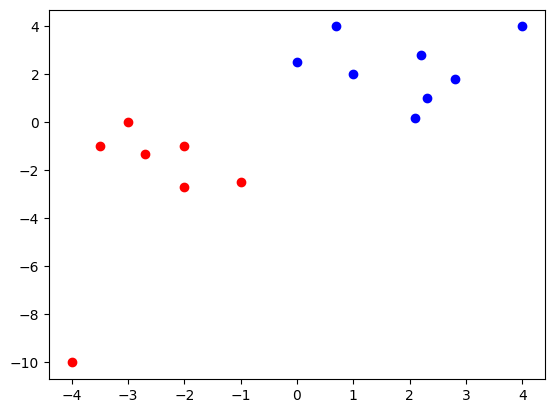

In [255]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [-4, -10], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8], [4, 4]])
y = np.array([1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In [256]:
m=0
n=0

for i in y:
    if i==1:
        m=m+1
    else:
        n=n+1
        
cluster1=X[0:m,:]
cluster2=X[m:,:]

In [257]:
# Write your code here

C=100

W = cp.Variable((2,1))
b = cp.Variable()
slack = cp.Variable((y.shape[0]))

# obj = cp.Minimize(cp.norm(W,2) + C*cp.sum(slack))
obj = cp.Minimize(0.5*cp.square(cp.norm(W,2))+C*cp.sum(slack))
               
xvals = [W.T @ cluster1[i] + b >=1-slack for i in range(m)]
yvals = [W.T @ cluster2[i] + b <=slack-1 for i in range(n)]
slack = [slack>=0]
               
constraints=xvals+yvals+slack
               
prob=cp.Problem(obj,constraints)
               
prob.solve()
               
Wf=W.value
bf=b.value
               
print("Value of W is: \n",Wf)
print("\n")
print("Value of b is: \n",bf)
print("\n")
print("Value of slack1 is: \n",slack1.value)
print("\n")
print("Value of slack2 is: \n",slack2.value)

Value of W is: 
 [[-0.38493724]
 [-0.35146444]]


Value of b is: 
 -0.12133891237372568


Value of slack1 is: 
 [-3.63773293e-13 -3.63092627e-13  2.30543362e-12 -3.63652142e-13
 -3.62532265e-13 -3.63949872e-13 -3.63272933e-13  1.32281301e-12
 -3.64017264e-13]


Value of slack2 is: 
 [ 4.01338263e-12 -3.63757307e-13 -3.63788685e-13 -3.64126081e-13
 -3.63827130e-13 -3.63932962e-13 -3.64116622e-13 -3.64338001e-13
 -3.64112486e-13]


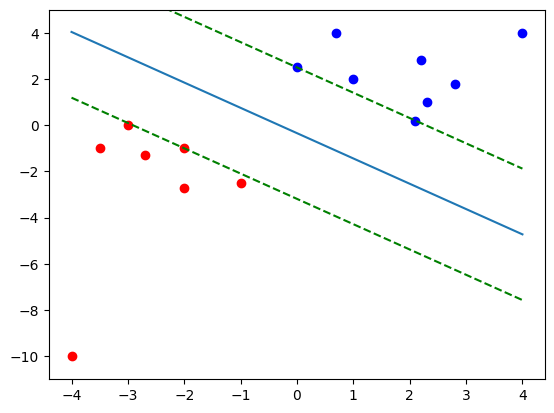

In [258]:
# Write your code here

x= np.linspace(-4,4,20)

plotsepline(Wf,bf,cluster1,x)
plot_points(X, y)

plt.ylim(-11, 5)
plt.show()

### Subsection 2

In [32]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Defaulting to user installation because normal site-packages is not writeable
--2023-03-11 21:59:40--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  5.51MB/s    in 1.7s    

2023-03-11 21:59:42 (5.51 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-11 21:59:44--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [ap

In [33]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [34]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [35]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [36]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [38]:
from sklearn import metrics

In [39]:
for C in [0.01, 0.1, 1, 10, 100]:
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        for gamma in ['scale', 'auto']:
            svmclassifier = SVC(C=C, kernel=kernel, gamma=gamma)
            svmclassifier.fit(X_train,y_train)
            y_pred = svmclassifier.predict(X_test)
            print("Accuracy for C = ", C, " kernel = ", kernel, " gamma = ", gamma, " is ", metrics.accuracy_score(y_test, y_pred))
            print("\n")

Accuracy for C =  0.01  kernel =  linear  gamma =  scale  is  0.8893333333333333


Accuracy for C =  0.01  kernel =  linear  gamma =  auto  is  0.8893333333333333


Accuracy for C =  0.01  kernel =  poly  gamma =  scale  is  0.375


Accuracy for C =  0.01  kernel =  poly  gamma =  auto  is  0.924


Accuracy for C =  0.01  kernel =  rbf  gamma =  scale  is  0.20533333333333334


Accuracy for C =  0.01  kernel =  rbf  gamma =  auto  is  0.11533333333333333


Accuracy for C =  0.01  kernel =  sigmoid  gamma =  scale  is  0.23066666666666666


Accuracy for C =  0.01  kernel =  sigmoid  gamma =  auto  is  0.11533333333333333


Accuracy for C =  0.1  kernel =  linear  gamma =  scale  is  0.8893333333333333


Accuracy for C =  0.1  kernel =  linear  gamma =  auto  is  0.8893333333333333


Accuracy for C =  0.1  kernel =  poly  gamma =  scale  is  0.8063333333333333


Accuracy for C =  0.1  kernel =  poly  gamma =  auto  is  0.924


Accuracy for C =  0.1  kernel =  rbf  gamma =  scale  is  0.8

Accuracy for C =  0.01  kernel =  linear  gamma =  scale  is  0.8893333333333333


Accuracy for C =  0.01  kernel =  linear  gamma =  auto  is  0.8893333333333333


Accuracy for C =  0.01  kernel =  poly  gamma =  scale  is  0.375


Accuracy for C =  0.01  kernel =  poly  gamma =  auto  is  0.924


Accuracy for C =  0.01  kernel =  rbf  gamma =  scale  is  0.20533333333333334


Accuracy for C =  0.01  kernel =  rbf  gamma =  auto  is  0.11533333333333333


Accuracy for C =  0.01  kernel =  sigmoid  gamma =  scale  is  0.23066666666666666


Accuracy for C =  0.01  kernel =  sigmoid  gamma =  auto  is  0.11533333333333333


Accuracy for C =  0.1  kernel =  linear  gamma =  scale  is  0.8893333333333333


Accuracy for C =  0.1  kernel =  linear  gamma =  auto  is  0.8893333333333333


Accuracy for C =  0.1  kernel =  poly  gamma =  scale  is  0.8063333333333333


Accuracy for C =  0.1  kernel =  poly  gamma =  auto  is  0.924


Accuracy for C =  0.1  kernel =  rbf  gamma =  scale  is  0.8716666666666667


Accuracy for C =  0.1  kernel =  rbf  gamma =  auto  is  0.11533333333333333


Accuracy for C =  0.1  kernel =  sigmoid  gamma =  scale  is  0.8286666666666667


Accuracy for C =  0.1  kernel =  sigmoid  gamma =  auto  is  0.11533333333333333


Accuracy for C =  1  kernel =  linear  gamma =  scale  is  0.8893333333333333


Accuracy for C =  1  kernel =  linear  gamma =  auto  is  0.8893333333333333


Accuracy for C =  1  kernel =  poly  gamma =  scale  is  0.9173333333333333


Accuracy for C =  1  kernel =  poly  gamma =  auto  is  0.924


Accuracy for C =  1  kernel =  rbf  gamma =  scale  is  0.9336666666666666


Accuracy for C =  1  kernel =  rbf  gamma =  auto  is  0.11533333333333333


Accuracy for C =  1  kernel =  sigmoid  gamma =  scale  is  0.8416666666666667


Accuracy for C =  1  kernel =  sigmoid  gamma =  auto  is  0.11533333333333333


Accuracy for C =  10  kernel =  linear  gamma =  scale  is  0.8893333333333333


Accuracy for C =  10  kernel =  linear  gamma =  auto  is  0.8893333333333333


Accuracy for C =  10  kernel =  poly  gamma =  scale  is  0.9236666666666666


Accuracy for C =  10  kernel =  poly  gamma =  auto  is  0.924


Accuracy for C =  10  kernel =  rbf  gamma =  scale  is  0.9413333333333334


Accuracy for C =  10  kernel =  rbf  gamma =  auto  is  0.11533333333333333


Accuracy for C =  10  kernel =  sigmoid  gamma =  scale  is  0.791


Accuracy for C =  10  kernel =  sigmoid  gamma =  auto  is  0.11533333333333333


Accuracy for C =  100  kernel =  linear  gamma =  scale  is  0.8893333333333333


Accuracy for C =  100  kernel =  linear  gamma =  auto  is  0.8893333333333333


Accuracy for C =  100  kernel =  poly  gamma =  scale  is  0.924


Accuracy for C =  100  kernel =  poly  gamma =  auto  is  0.924


Accuracy for C =  100  kernel =  rbf  gamma =  scale  is  0.9413333333333334


Accuracy for C =  100  kernel =  rbf  gamma =  auto  is  0.11533333333333333


Accuracy for C =  100  kernel =  sigmoid  gamma =  scale  is  0.7683333333333333


Accuracy for C =  100  kernel =  sigmoid  gamma =  auto  is  0.11533333333333333




### We are getting highest accuracy (0.94133) with C=10, Kernel = RBF and Gamma = Scale

In [41]:
# printing the  accuracy, confusion matrix and f1 score for C=10, kernel=rbf and gamma=scale

C=10

svmclassifier = SVC(C=C, kernel='rbf', gamma='scale')
svmclassifier.fit(X_train,y_train)
y_pred = svmclassifier.predict(X_test)
print("Accuracy for C = ", C, " kernel = ", kernel, " gamma = ", gamma, " is ", metrics.accuracy_score(y_test, y_pred))
print("\n")
print("Confusion Matrix for C = ", C, " kernel = ", kernel, " gamma = ", gamma, " is \n", metrics.confusion_matrix(y_test, y_pred))
print("\n")
print("F1 Score for C = ", C, " kernel = ", kernel, " gamma = ", gamma, " is ", metrics.f1_score(y_test, y_pred, average='macro'))
print("\n")



Accuracy for C =  10  kernel =  sigmoid  gamma =  auto  is  0.9413333333333334


Confusion Matrix for C =  10  kernel =  sigmoid  gamma =  auto  is 
 [[292   0   1   1   1   0   0   1   1   0]
 [  0 340   1   2   0   0   2   1   0   0]
 [  0   1 298   4   2   0   1   4   2   0]
 [  2   0   5 259   0   5   0   3   2   3]
 [  1   0   1   0 265   0   3   0   0  11]
 [  2   1   0   6   0 247   3   1   3   2]
 [  7   0   3   0   2   2 276   0   0   0]
 [  0   6   4   2   5   0   0 273   2  11]
 [  1   1   2   6   3   4   2   3 275   4]
 [  2   3   1   5  12   1   0   2   1 299]]


F1 Score for C =  10  kernel =  sigmoid  gamma =  auto  is  0.9408611302190598


